<a href="https://colab.research.google.com/github/javgonzalezvi/AlgorithmsUN2022I/blob/master/Lab14/AlgorithmicToolboxWeek5Group9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Money change again**

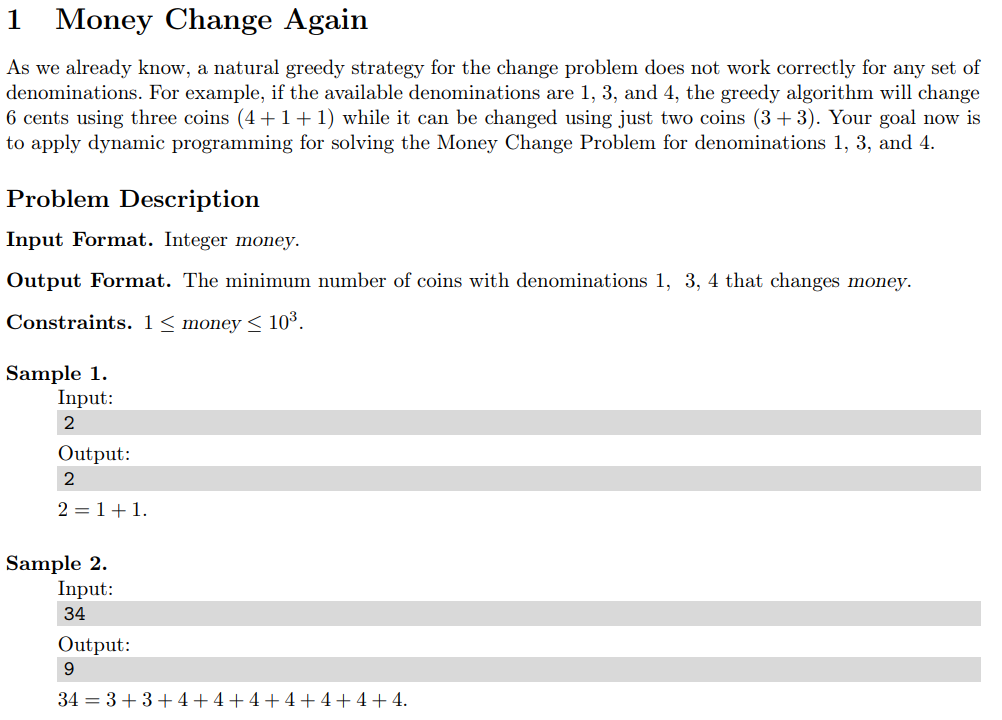

In [14]:
import math

def moneyChange(money): 

    denominations = [1, 3, 4]
    min_coins = [0] + [math.inf]*money

    for i in range(1, money+1):
        for j in denominations:
            if i>=j:
                coins = min_coins[i-j]+1
                if coins < min_coins[i]:
                    min_coins[i] = coins

    print(min_coins[money])

In [15]:
money = 2
moneyChange(money)

2


In [16]:
money = 34
moneyChange(money)

9


# **2. Primitive Calculator**


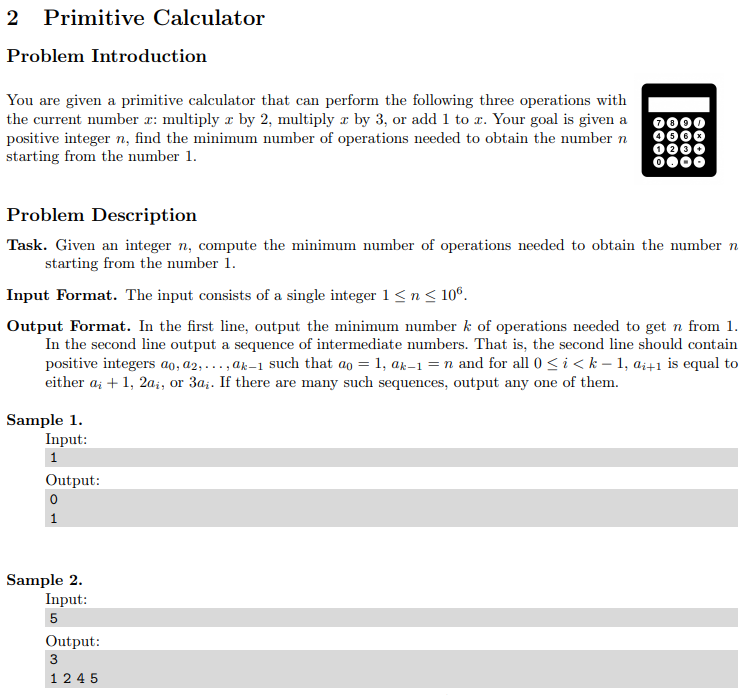

In [23]:
def primitiveCalculator(n):
    num_operations = [0, 0] + [math.inf]*(n-1)

    for i in range(2, n+1):
        temp1, temp2, temp3 = [math.inf]*3
        temp1 = num_operations[i-1] + 1 

        if i%2 == 0: 
          temp2 = num_operations[i//2] + 1

        if i%3 == 0: 
          temp3 = num_operations[i//3] + 1
        
        min_ops = min(temp1, temp2, temp3)
        num_operations[i] = min_ops

    print(num_operations[n])

    nums = [n]

    while n!=1:
        if n%3 ==0 and num_operations[n]-1 == num_operations[n//3]:
            nums += [n//3]
            n = n//3
        elif n%2 ==0 and num_operations[n]-1 == num_operations[n//2]:
            nums += [n//2]
            n = n//2
        else:
            nums += [n-1]
            n = n - 1 

    print(' '.join([str(i) for i in nums][::-1]))

In [24]:
n = 1
primitiveCalculator(n)

0
1


In [25]:
n = 5
primitiveCalculator(n)

3
1 2 4 5


# **3. Edit Distance**

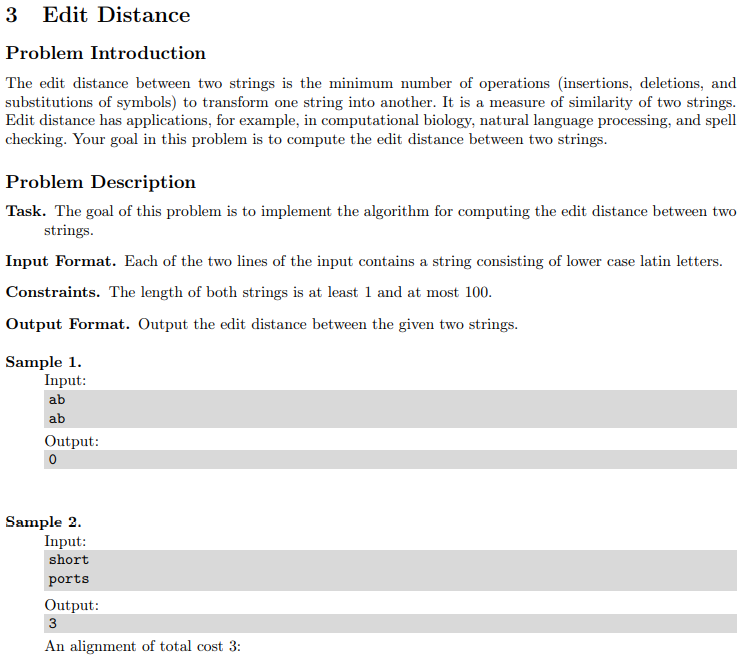

In [31]:
import numpy

def editDistance(s1, s2):

    ln_s1 = len(s1)
    ln_s2 = len(s2)

    Matrix = numpy.zeros((ln_s1+1 , ln_s2+1))

    for i in range(ln_s2+1):
        Matrix[0][i] = i

    for i in range(ln_s1+1):
        Matrix[i][0] = i

    for i in range(1, ln_s1+1):
        for j in range(1, ln_s2+1):
            insertion = Matrix[i][j-1]   + 1
            deletion  = Matrix[i-1][j]   + 1
            mismatch  = Matrix[i-1][j-1] + 1
            match     = Matrix[i-1][j-1]
      
            if s1[i-1] == s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, match)
            if s1[i-1] != s2[j-1]:
                Matrix[i][j] = min(insertion, deletion, mismatch)
    
    return (int(Matrix[ln_s1][ln_s2]), Matrix)

In [32]:
def optimalAlignment(Matrix, s1, s2, top, bottom, i, j):

    if i == 0 and j == 0:
        return (' '.join(top[::-1]), ' '.join(bottom[::-1]))

    if i>0 and Matrix[i][j] == Matrix[i-1][j] + 1:
        top.append(f'|{s1[i-1]}|')
        bottom.append('|-|')
        return optimalAlignment(Matrix, s1, s2, top, bottom, i-1, j)

    elif j>0 and Matrix[i][j] == Matrix[i][j-1] + 1:
        bottom.append(f'|{s2[j-1]}|')
        top.append('|-|')
        return optimalAlignment(Matrix, s1, s2, top, bottom, i, j-1)

    else:
        top.append(f'|{s1[i-1]}|')
        bottom.append(f'|{s2[j-1]}|')
        return optimalAlignment(Matrix, s1, s2, top, bottom, i-1, j-1)

In [33]:
s1 = 'ab'
s2 = 'ab'

edit_distance, Matrix = editDistance(s1, s2)
top, bottom = optimalAlignment(Matrix, s1, s2, [], [], len(s1), len(s2))

print(edit_distance)

0


In [35]:
s1 = 'short'
s2 = 'ports'

edit_distance, Matrix = editDistance(s1, s2)
top, bottom = optimalAlignment(Matrix, s1, s2, [], [], len(s1), len(s2))

print(edit_distance)

3


# **4. Longest Common Subsequence of Two Sequence**

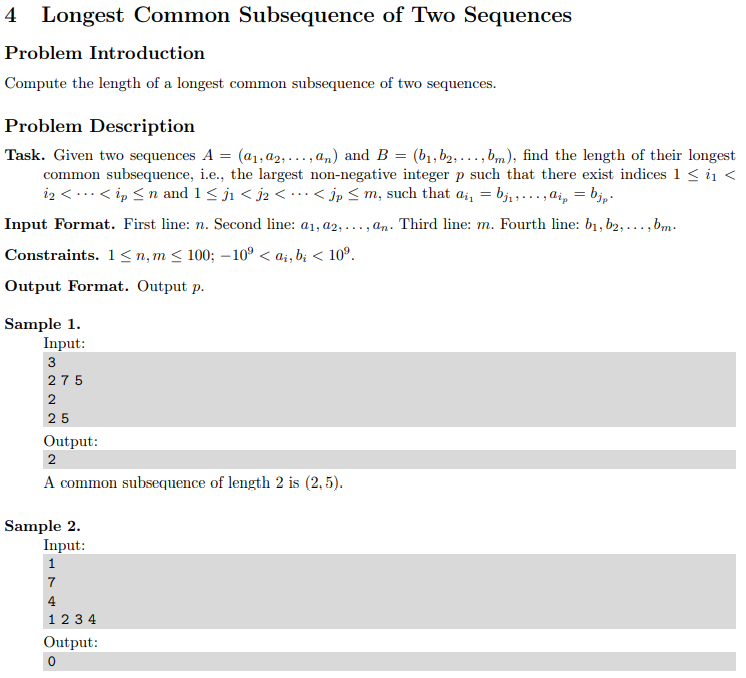

In [47]:
def LCS(n,m,a,b):
    lsm = [[0 for i in range(m + 1)] for j in range(n + 1)]

    for i in range(1, n+1):
        for j in range(1, m+1):
            if a[i-1] == b[j-1]:
                lsm[i][j] = lsm[i-1][j-1] + 1
            elif a[i-1] != b[j-1]:
                lsm[i][j] = max(lsm[i-1][j-1], lsm[i-1][j], lsm[i][j-1])

    print(lsm[n][m])

In [48]:
n = 3
m = 2
a = [2, 7, 5]
b = [2, 5]

LCS(n,m,a,b)

2


In [49]:
n = 1
m = 4
a = [7]
b = [1, 2, 3, 4]

LCS(n,m,a,b)

0


# **5. Longest Common Subsequence of Three Sequence**

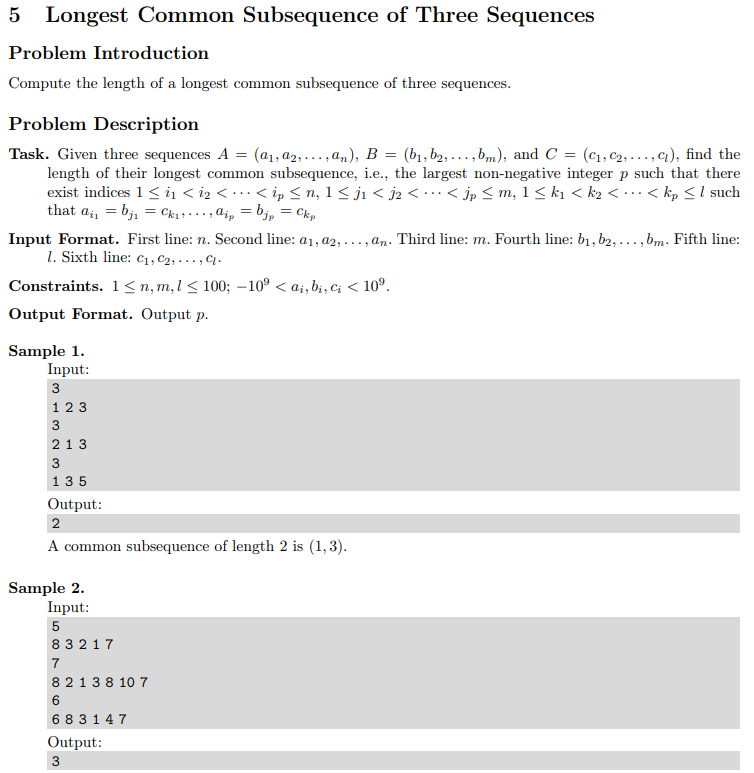

In [56]:
import sys

def LCS3(a, b, c):

    T = [[[0]*(len(a)+1) for _ in range(len(b)+1)] for ex in range(len(c)+1)]
    for i in range(1,len(a)+1):
        for j in range(1,len(b)+1):
            for k in range(1,len(c)+1):
                if a[i-1]==b[j-1]==c[k-1]:
                    T[k][j][i] = T[k-1][j-1][i-1] + 1
                else :
                    T[k][j][i] = max(T[k-1][j][i],T[k][j-1][i],T[k][j][i-1])

    print(T[k][j][i])

In [58]:
a = [1, 2, 3]
b = [2, 1, 3]
c = [1, 3, 4]

LCS3(a, b, c)


2


In [59]:
a = [8, 3, 2, 1, 7]
b = [8, 2, 1, 3, 8, 10, 7]
c = [6, 8, 3, 1, 4, 7]

LCS3(a, b, c)

3
